In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the data
file_path = r"C:\\Users\\Asus\\Downloads\\Monu_final_df.csv"
data = pd.read_csv(r"C:\\Users\\Asus\\Downloads\\Monu_final_df.csv", index_col='Unnamed: 0')

In [3]:
# Convert 'BookingEndDateTime' to datetime format and set it as the index
data['BookingEndDateTime'] = pd.to_datetime(data['BookingEndDateTime'])
data.set_index('BookingEndDateTime', inplace=True)

In [4]:
# Extract date-related features
data['DayOfWeek'] = data.index.dayofweek
data['Hour'] = data.index.hour
data['Month'] = data.index.month

In [5]:
# Define pricing rules
def adjust_price(row):
    price = row['Price (INR)']
    
    # Rule 1: High-Demand Periods
    if row['DayOfWeek'] in [5, 6] or row['Hour'] in range(17, 22):  # Weekends or evenings
        price *= 1.20
    # Rule 2: Low-Demand Periods
    elif row['DayOfWeek'] in [0, 1, 2, 3, 4] and row['Hour'] in range(9, 12):  # Weekdays mornings
        price *= 0.90
    # Rule 3: Class Popularity (Assuming 'ActivitySiteID' as class identifier)
    popular_classes = [1, 2, 3]  # Example popular class IDs
    if row['ActivitySiteID'] in popular_classes:
        price *= 1.15

    return price

In [6]:
# Apply pricing rules
data['Adjusted Price (INR)'] = data.apply(adjust_price, axis=1)


In [7]:
# Display a few rows with adjusted prices
print(data[['ActivitySiteID', 'DayOfWeek', 'Hour', 'Price (INR)', 'Adjusted Price (INR)']].head())


                    ActivitySiteID  DayOfWeek  Hour  Price (INR)  \
BookingEndDateTime                                                 
2018-04-08                       1          6     0        499.0   
2018-04-15                       1          6     0        499.0   
2018-04-22                       1          6     0        499.0   
2018-04-29                       1          6     0        499.0   
2018-05-06                       1          6     0        499.0   

                    Adjusted Price (INR)  
BookingEndDateTime                        
2018-04-08                        688.62  
2018-04-15                        688.62  
2018-04-22                        688.62  
2018-04-29                        688.62  
2018-05-06                        688.62  


In [8]:
# Calculate the differences in bookings before and after applying the dynamic pricing
data['Price Difference'] = data['Adjusted Price (INR)'] - data['Price (INR)']

In [9]:
# Assuming demand elasticity: If price increases by 1%, demand decreases by 0.5% (example elasticity)
data['Adjusted Demand'] = data['Number Booked'] * (1 - 0.005 * (data['Price Difference'] / data['Price (INR)']))

In [12]:
data.isnull().sum()

ActivitySiteID                              0
BookingEndDateTime (Month / Day / Year)     0
Number Booked                               0
Price (INR)                                18
DayOfWeek                                   0
Hour                                        0
Month                                       0
Adjusted Price (INR)                       18
Price Difference                           18
Adjusted Demand                            18
dtype: int64

In [14]:
data = data.dropna()

In [15]:
# Evaluate effectiveness
original_mae = mean_absolute_error(data['Number Booked'], data['Price (INR)'])
adjusted_mae = mean_absolute_error(data['Adjusted Demand'], data['Adjusted Price (INR)'])

original_mse = mean_squared_error(data['Number Booked'], data['Price (INR)'])
adjusted_mse = mean_squared_error(data['Adjusted Demand'], data['Adjusted Price (INR)'])

print("Original MAE:", original_mae)
print("Adjusted MAE:", adjusted_mae)
print("Original MSE:", original_mse)
print("Adjusted MSE:", adjusted_mse)

Original MAE: 1836.4278239458295
Adjusted MAE: 2064.126474930748
Original MSE: 4006286.8470298555
Adjusted MSE: 5103868.410863807


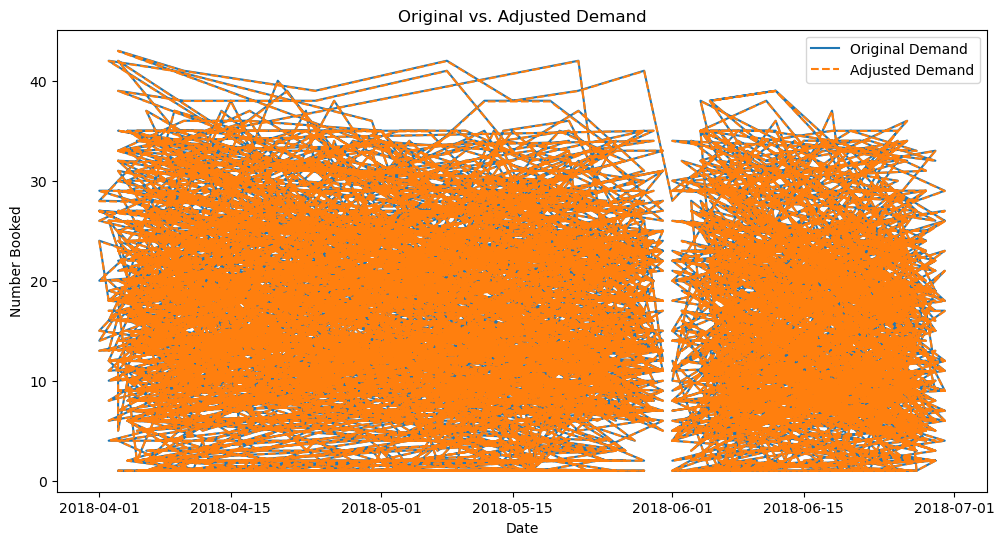

In [16]:
# Plot the results

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Number Booked'], label='Original Demand')
plt.plot(data.index, data['Adjusted Demand'], label='Adjusted Demand', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number Booked')
plt.title('Original vs. Adjusted Demand')
plt.legend()
plt.show()


In [17]:


# Assuming demand elasticity: If price increases by 1%, demand decreases by 0.5% (example elasticity)
data['Adjusted Demand'] = data['Number Booked'] * (1 - 0.005 * (data['Price Difference'] / data['Price (INR)']))

# Evaluate effectiveness
original_mae = mean_absolute_error(data['Number Booked'], data['Price (INR)'])
adjusted_mae = mean_absolute_error(data['Adjusted Demand'], data['Adjusted Price (INR)'])



